,Sepal_Length,Sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


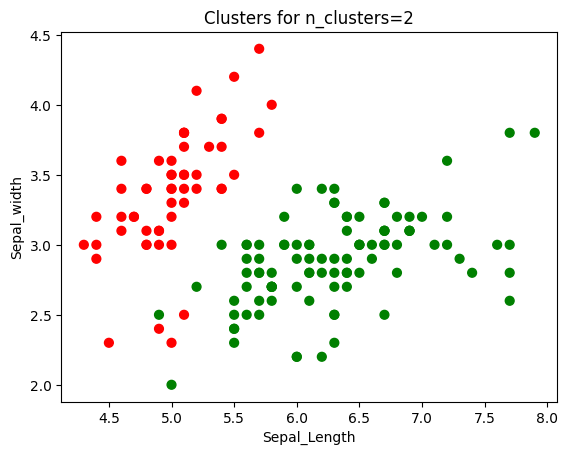

Parameter: {'n_clusters': 2} Score 0.6810461692117462


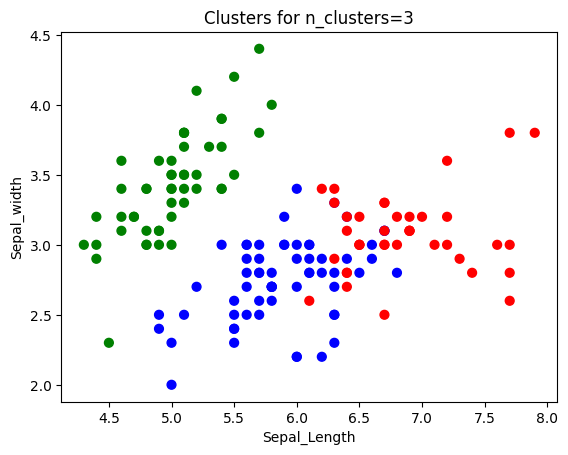

Parameter: {'n_clusters': 3} Score 0.551191604619592


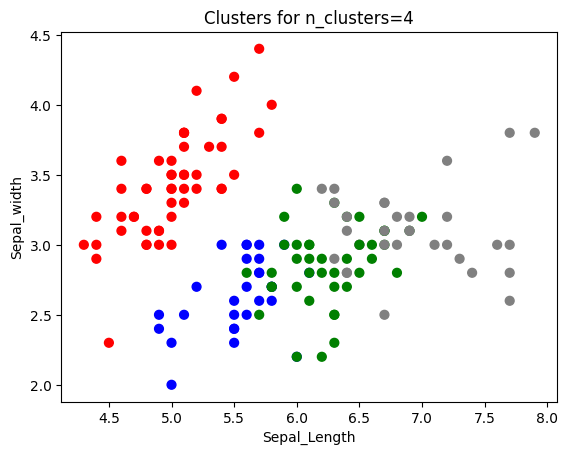

Parameter: {'n_clusters': 4} Score 0.49805050499728737


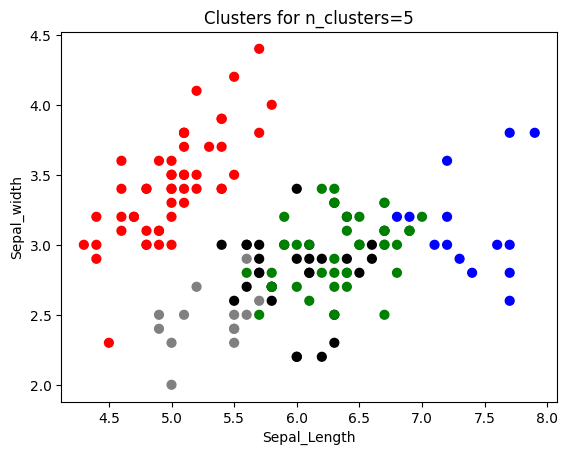

Parameter: {'n_clusters': 5} Score 0.43906462165095433


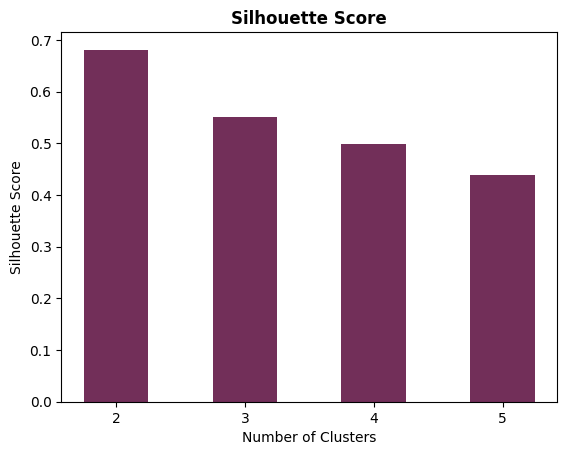

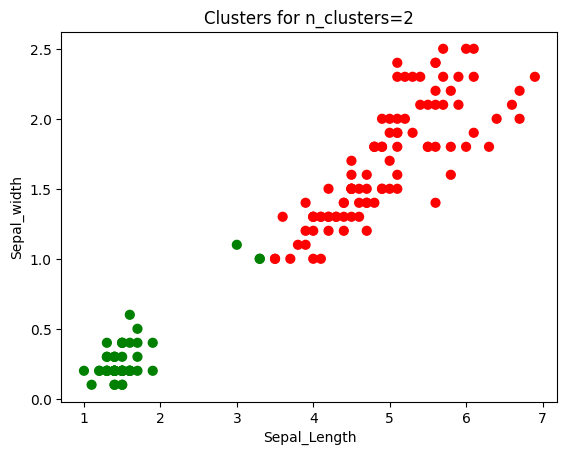

Parameter: {'n_clusters': 2} Score 0.6810461692117462


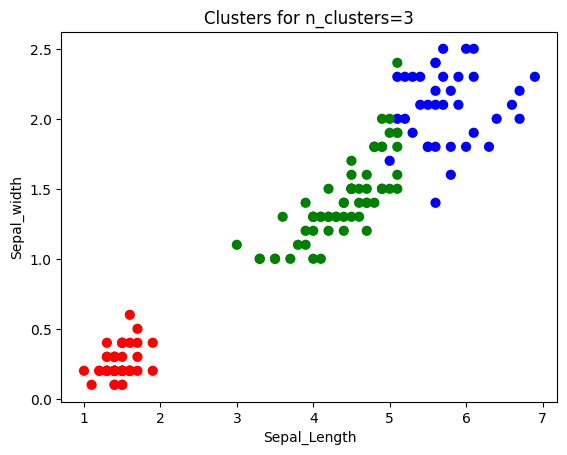

Parameter: {'n_clusters': 3} Score 0.5528190123564095


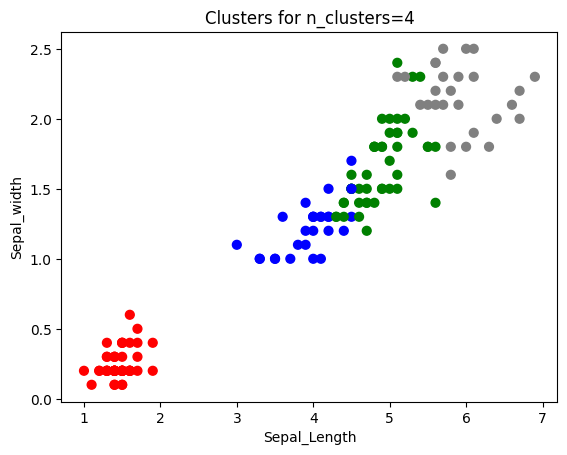

Parameter: {'n_clusters': 4} Score 0.4965168654914938


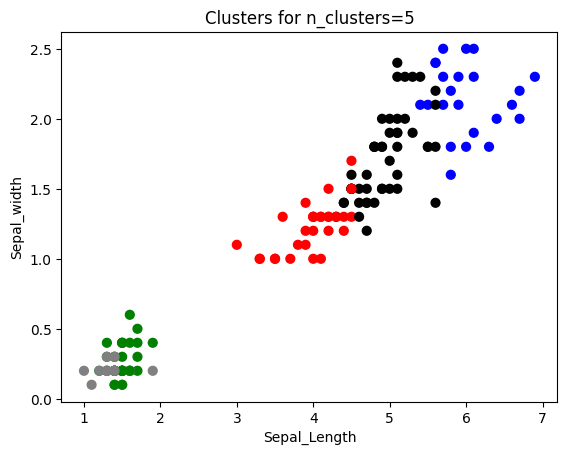

Parameter: {'n_clusters': 5} Score 0.36892049356935436


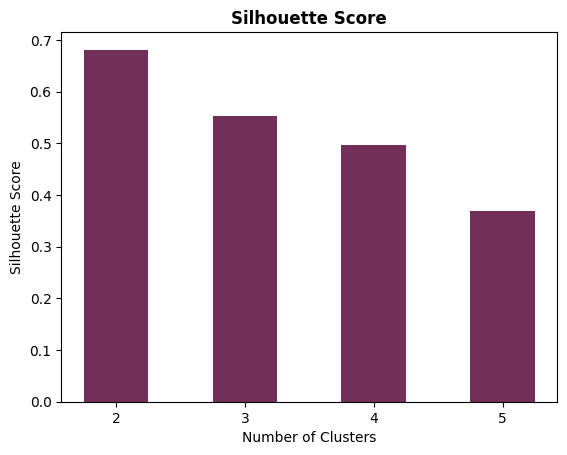

Best number of clusters: 2


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn import datasets
import numpy as np

def kmean_hyper_param_tuning(data):
    parameters = [2, 3, 4, 5]
    parameter_grid = ParameterGrid({'n_clusters': parameters})
    colormap = np.array(['red', 'green', 'blue', 'gray', 'black'])
    best_score = -1
    kmeans_model = KMeans()
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)
        kmeans_model.fit(data)
        
        # Visualización de los clusters
        plt.figure()
        plt.scatter(data['Sepal_Length'], data['Sepal_width'], c=colormap[kmeans_model.labels_], s=40)
        plt.title(f'Clusters for n_clusters={p["n_clusters"]}')
        plt.xlabel('Sepal_Length')
        plt.ylabel('Sepal_width')
        plt.show()
        
        ss = metrics.silhouette_score(data, kmeans_model.labels_)
        silhouette_scores.append(ss)
        
        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    # Visualización de los puntajes de Silhouette
    plt.bar(range(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), parameters)
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    return best_grid['n_clusters']

def kmean_hyper_param_tuning_2 (data):
    parameters = [2, 3, 4, 5]
    parameter_grid = ParameterGrid({'n_clusters': parameters})
    colormap = np.array(['red', 'green', 'blue', 'gray', 'black'])
    best_score = -1
    kmeans_model = KMeans()
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)
        kmeans_model.fit(data)
        
        # Visualización de los clusters
        plt.figure()
        plt.scatter(data['Petal_Length'], data['Petal_width'], c=colormap[kmeans_model.labels_], s=40)
        plt.title(f'Clusters for n_clusters={p["n_clusters"]}')
        plt.xlabel('Sepal_Length')
        plt.ylabel('Sepal_width')
        plt.show()
        
        ss = metrics.silhouette_score(data, kmeans_model.labels_)
        silhouette_scores.append(ss)
        
        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    # Visualización de los puntajes de Silhouette
    plt.bar(range(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), parameters)
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

def main():
    iris = datasets.load_iris()
    
    x = pd.DataFrame(iris.data)
    x.columns = ['Sepal_Length', 'Sepal_width', 'Petal_Length', 'Petal_width']
    display(x)
    
    n_clusters = kmean_hyper_param_tuning(x)
    kmean_hyper_param_tuning_2(x)
    print('Best number of clusters:', n_clusters)

if __name__ == "__main__":
    main()
